In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("adult.csv")
data.shape

(32561, 15)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data=data.replace('?',np.nan)

In [5]:
cols_to_drop=['fnlwgt','marital-status','relationship','race','workclass']

In [6]:
data.drop(columns=cols_to_drop,inplace=True)

In [7]:
data.head()

,age,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,Bachelors,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,11th,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Bachelors,13,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [8]:
data.isna().sum()

age               0
education         0
education-num     0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   sex             32561 non-null  object
 5   capital-gain    32561 non-null  int64 
 6   capital-loss    32561 non-null  int64 
 7   hours-per-week  32561 non-null  int64 
 8   country         32561 non-null  object
 9   salary          32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [10]:
data._get_numeric_data().columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [11]:
data.select_dtypes(include=['object']).columns 

Index(['education', 'occupation', 'sex', 'country', 'salary'], dtype='object')

In [12]:
data.head(2)

,age,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,Bachelors,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K


In [13]:
dummies = pd.get_dummies(data[['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])

dummies = dummies.join(data[['education', 'occupation', 'sex', 'country', 'salary']])

dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,country,salary
0,39,13,2174,0,40,Bachelors,Adm-clerical,Male,United-States,<=50K
1,50,13,0,0,13,Bachelors,Exec-managerial,Male,United-States,<=50K
2,38,9,0,0,40,HS-grad,Handlers-cleaners,Male,United-States,<=50K
3,53,7,0,0,40,11th,Handlers-cleaners,Male,United-States,<=50K
4,28,13,0,0,40,Bachelors,Prof-specialty,Female,Cuba,<=50K


In [14]:
#dummies['salary'].unique()

In [15]:
#dummies['salary'] = dummies['salary'].map({' <=50K' : 0, '>50K' : 1})

In [16]:
X = dummies.iloc[:, 0:-1]  
y = dummies.iloc[:, -1]

In [17]:
len(X.columns)

9

In [18]:
X.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,country
0,39,13,2174,0,40,Bachelors,Adm-clerical,Male,United-States
1,50,13,0,0,13,Bachelors,Exec-managerial,Male,United-States


In [19]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [20]:
cat_df = X.select_dtypes(include=['object']).copy()

In [21]:
cat_df.columns

Index(['education', 'occupation', 'sex', 'country'], dtype='object')

In [22]:
cat_df.head()

,education,occupation,sex,country
0,Bachelors,Adm-clerical,Male,United-States
1,Bachelors,Exec-managerial,Male,United-States
2,HS-grad,Handlers-cleaners,Male,United-States
3,11th,Handlers-cleaners,Male,United-States
4,Bachelors,Prof-specialty,Female,Cuba


In [23]:
cat_df.columns

Index(['education', 'occupation', 'sex', 'country'], dtype='object')

In [24]:
cat_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [25]:
cat_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
cat_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [27]:
cat_df['country'].unique() 

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [28]:
cat_df['education'] = cat_df['education'].map({' Bachelors' : 10, ' HS-grad' : 7 ,'11th':3,' Masters':11,'9th':4,' Some-college':3,'Assoc-acdm':12,' Assoc-voc':13,' 7th-8th':3,' Doctorate':14,' Prof-school':3,' 5th-6th':2,' 10th':5,' 1st-4th':1,'Preschool':6,' 12th':3})
cat_df['occupation'] = cat_df['occupation'].map({' Adm-clerical':12, ' Exec-managerial':13, ' Handlers-cleaners':1,
       ' Prof-specialty':11, ' Other-service':3, ' Sales':2, ' Craft-repair':2,
       ' Transport-moving':4, ' Farming-fishing':10, ' Machine-op-inspct':9,
       ' Tech-support':6, ' ?':1, ' Protective-serv':7, ' Armed-Forces':8,
       ' Priv-house-serv':5})
cat_df['sex'] = cat_df['sex'].map({'Male' : 1, 'Female' : 0})
cat_df['country'] = cat_df['country'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':0, ' Mexico':5,
       ' South':6, ' Puerto-Rico':7, ' Honduras':8, ' England':9, ' Canada':10,
       ' Germany':11, ' Iran':12, ' Philippines':13, ' Italy':14, ' Poland':15,
       ' Columbia':16, ' Cambodia':17, ' Thailand':18, ' Ecuador':19, ' Laos':20,
       ' Taiwan':21, ' Haiti':22, ' Portugal':23, ' Dominican-Republic':24,
       ' El-Salvador':25, ' France':26, ' Guatemala':27, ' China':28, ' Japan':29,
       ' Yugoslavia':30, ' Peru':31, ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33,
       ' Trinadad&Tobago':34, ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38,
       ' Ireland':39, ' Hungary':40, ' Holand-Netherlands':41})

In [29]:
cat_df.head()

,education,occupation,sex,country
0,10.0,12,NaN,1
1,10.0,13,NaN,1
2,7.0,1,NaN,1
3,NaN,1,NaN,1
4,10.0,11,NaN,2


In [30]:
num_df = data.select_dtypes(include=['int64']).copy()

In [31]:
num_df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [32]:
num_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [33]:
final_df=pd.concat([num_df,cat_df], axis=1)

In [34]:
final_df=final_df.replace(np.NaN,'0')

In [35]:
final_df.head(150)

,age,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,country
0,39,13,2174,0,40,10.0,12,0,1
1,50,13,0,0,13,10.0,13,0,1
2,38,9,0,0,40,7.0,1,0,1
3,53,7,0,0,40,0,1,0,1
4,28,13,0,0,40,10.0,11,0,2
...,...,...,...,...,...,...,...,...,...
145,31,9,0,0,30,7.0,4,0,1
146,22,10,0,0,24,3.0,3,0,1
147,36,9,0,0,24,7.0,3,0,1
148,64,7,0,2179,40,0,2,0,1


In [36]:
x=final_df

In [37]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

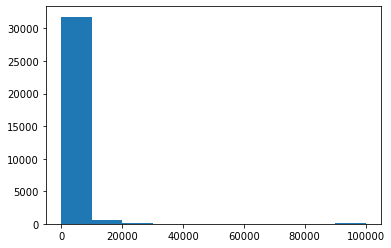

In [38]:
plt.hist(final_df['capital-gain'])

In [39]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

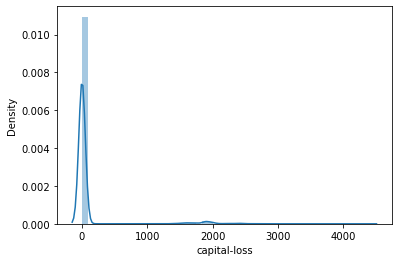

In [40]:
sns.distplot(final_df['capital-loss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

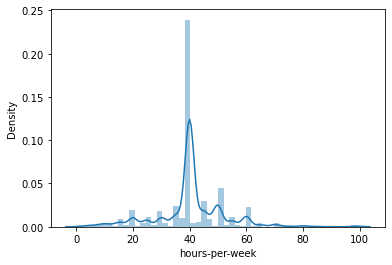

In [41]:
sns.distplot(final_df['hours-per-week'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

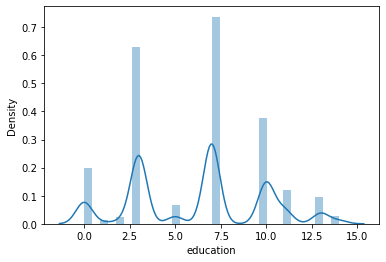

In [42]:
sns.distplot(final_df['education'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='occupation', ylabel='Density'>

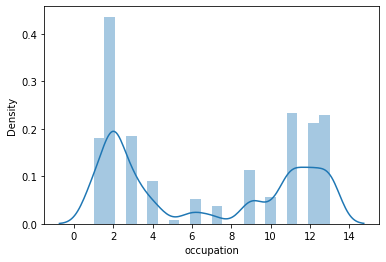

In [43]:
sns.distplot(final_df['occupation'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain', ylabel='hours-per-week'>

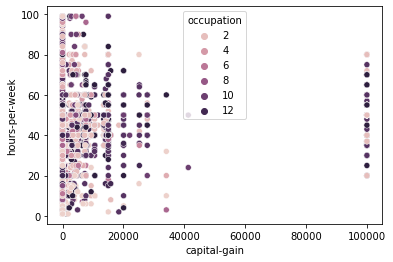

In [44]:
sns.scatterplot(final_df['capital-gain'],final_df['hours-per-week'], hue=final_df['occupation'] )

<AxesSubplot:>

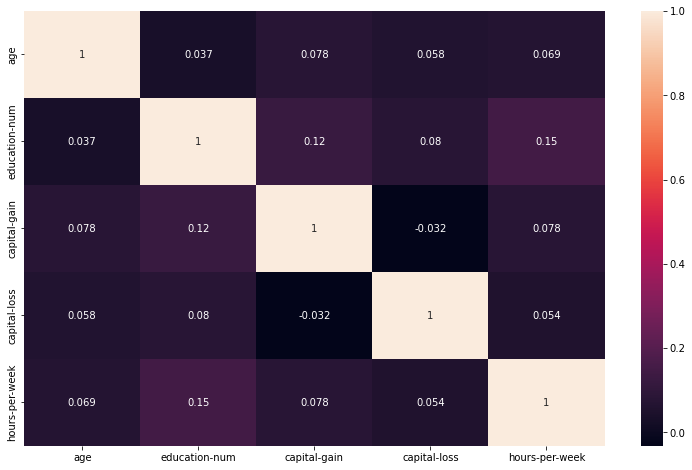

In [45]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

In [46]:
x.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education', 'occupation', 'sex', 'country'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [48]:
train_x.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,country
3291,74,4,0,0,2,3.0,1,0,1
29803,35,13,8614,0,45,10.0,2,0,1
25771,44,12,0,0,25,0,2,0,1
30631,49,9,0,0,40,7.0,4,0,1
28876,41,9,0,0,40,7.0,1,0,1


In [49]:
num_df=train_x[['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'education',
       'occupation', 'sex', 'country']]

In [50]:
num_df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education', 'occupation', 'sex', 'country'],
      dtype='object')

In [51]:
print(train_x.shape)
print(num_df.shape)

(24420, 9)
(24420, 9)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(24420, 9)

In [54]:
scaled_num_df.isna().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
education         0
occupation        0
sex               0
country           0
dtype: int64

In [55]:
num_df.isna().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
education         0
occupation        0
sex               0
country           0
dtype: int64

In [56]:
test_x.isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
education         0
occupation        0
sex               0
country           0
dtype: int64

In [57]:
from sklearn.svm import SVC
sv_classifier=SVC()

In [58]:
#num_df=num_df.replace(np.NaN,'0')
#train_y=train_y.replace(np.NaN,'0')
#test_x=test_x.replace(np.NaN,'0')

In [59]:
y_pred = sv_classifier.fit(num_df, train_y).predict(test_x)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
sc=accuracy_score(test_y,y_pred)
sc

0.8024812676575359

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [64]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [65]:
grid.fit(num_df, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.803 total time=  14.9s
[CV 2/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.801 total time=  14.6s
[CV 3/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.796 total time=  14.4s
[CV 4/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.800 total time=  14.3s
[CV 5/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.796 total time=  14.1s
[CV 1/5] END C=0.1, kernel=rbf, random_state=100;, score=0.803 total time=  14.9s
[CV 2/5] END C=0.1, kernel=rbf, random_state=100;, score=0.801 total time=  14.3s
[CV 3/5] END C=0.1, kernel=rbf, random_state=100;, score=0.796 total time=  14.5s
[CV 4/5] END C=0.1, kernel=rbf, random_state=100;, score=0.800 total time=  15.4s
[CV 5/5] END C=0.1, kernel=rbf, random_state=100;, score=0.796 total time=  14.1s
[CV 1/5] END C=0.1, kernel=rbf, random_state=200;, score=0.803 total time=  14.7s
[CV 2/5] END C=0.1, kernel=rbf, random_st

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             verbose=3)

In [66]:
grid.best_estimator_

SVC(random_state=0)

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb=XGBClassifier()

In [80]:
train_y. get('salary')

In [82]:
# train_y['salary'] = train_y['salary'].map({'>50K' : 1, '<=50K' : 0})

In [83]:
# train_y.loc[train_y['salary']== '>50K']

In [89]:
# train_y.head()

In [84]:
#y_pred = xgb.fit(num_df, train_y).predict(test_x)

In [90]:
# ac2=accuracy_score(test_y,y_pred)
# ac2